## Here goes the file which tests creating a subset (use list of dirs or something similar to pick ~1400 random clean files)

In [2]:
import numpy as np
import os
import itertools
import shutil
import pandas as pd
import forced_phot as fp

DATAPATH = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data'
mask = [x.isnumeric() for x in os.listdir(DATAPATH)]
datadirs = np.array(os.listdir(DATAPATH))[mask]
datadirs2 = [os.path.join(DATAPATH,d) for d in datadirs]
ztfnames = [os.listdir(dir) for dir in datadirs2]
banlist = np.array(os.listdir(DATAPATH))[np.invert(mask)]

In [3]:
# for i,ddir in enumerate(datadirs2):
#     for ztfname in ztfnames[i]:
#         with open('list_of_dirs.txt','a') as f:
#                f.write(os.path.join(ddir, ztfname)+'\n')


In [4]:
def flatten_list(nested_list):
    return list(itertools.chain(*nested_list))

In [5]:
len(flatten_list(ztfnames))

14242

In [6]:
def walkdatapath(): #only run if the txt file is completely empty else you get duplicates.
   files = []
   for root, dirs, files in os.walk(DATAPATH, topdown=False):
      if np.any([d in root for d in banlist]):
         continue
      for name in files:
         if 'clean_data' in name:
            # print(os.path.join(root,name))
            with open('list_of_clean_dirs.txt','a') as f:
               f.write(os.path.join(root, name)+'\n')


In [7]:
with open('list_of_dirs.txt','r') as f:
    lines = f.readlines()

lines = np.array([l.strip('\n') for l in lines],dtype=str)
n = len(lines)
np.random.seed(42)
sample_idx = np.random.randint(0,n-1,n//10)
len(sample_idx),np.unique(sample_idx).shape

(1424, (1353,))

In [8]:
sample = lines[sample_idx]

#largely based on
#https://stackoverflow.com/questions/1868714/how-do-i-copy-an-entire-directory-of-files-into-an-existing-directory-using-pyth
#with own alterations
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        dst_full = os.path.join(dst,os.path.split(src)[-1])
        d = os.path.join(dst_full, item)
        if os.path.isdir(dst_full):
            shutil.copy2(s, d)
        else:
            os.mkdir(dst_full)
            shutil.copy2(s, d)
        


# for i,path in enumerate(sample):
#     copytree(path,r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset')


# # pd.read_csv(sample[0],sep='\t',comment='#',names=['time','flux','flux_unc','zeropoint','filter'])

In [9]:
sampledir = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset'


5


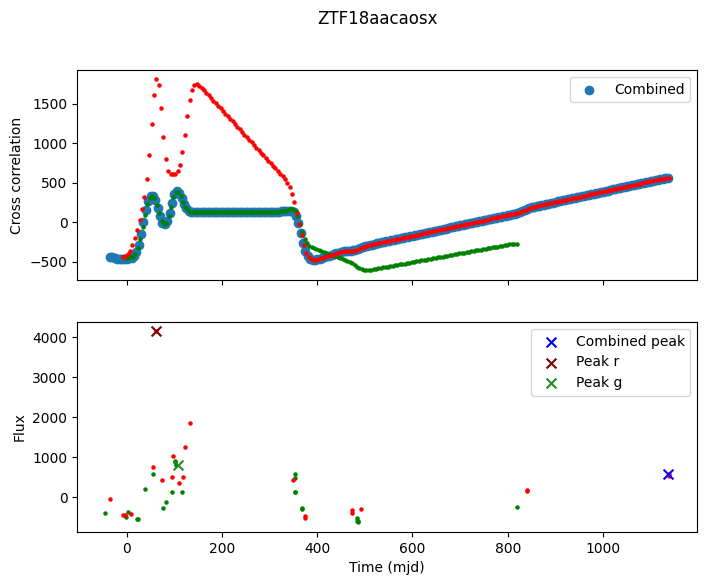

In [10]:
ztf_name = 'ZTF18aacaosx'
err_ztf_path = os.path.join(sampledir,ztf_name)
err_data = pd.read_csv(os.path.join(err_ztf_path,ztf_name+"_clean_data.txt"),sep='\t',comment='#',names=['time','flux','flux_unc','zeropoint','filter'])
err_flux = err_data['flux'].values
err_time = err_data['time'].values - 2458484.5
err_data
# ztf_obj = fp.ZTF_forced_phot(os.path.join(sampledir,ztf),ztf_name=ztf)
# np.percentile(err_flux[np.invert(time_mask)&self.clean_filtermasks[0]]
peak_ind,t_0_guess,peak_guess = fp.cross_correlation(err_flux,err_time,full_output=False,interp_data=True)
        # print('Combined',peak_ind,t_0_guess,peak_guess)
        # peak_ind,t_0_guess,peak_guess = fp.cross_correlation(flux[self.clean_filtermasks[0]],clean_data['time'].values[self.clean_filtermasks[0]],time_zeropoint,full_output=False,interp_data=True)

time_mask = (err_time > (t_0_guess - 365)) & (err_time < (t_0_guess+365*2)) #these are the times we will be fitting on
print(time_mask.sum())

fp.show_cross_correlation(ztf_name,sampledir)


In [15]:
n_err = 0
for i,ztf in enumerate(os.listdir(sampledir)):
    # if i < 500:
    # print(ztf)
    plotname = ztf+'_fit.png'
    if plotname in os.listdir(r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset_plots'):
        print("Already done, passing over instance")
        continue
    try:
        ztf_obj = fp.ZTF_forced_phot(os.path.join(sampledir,ztf),ztf_name=ztf,onefilt_crosscor=False)
    except (FileNotFoundError,IndexError) as e:
        if e is FileNotFoundError:
            shutil.rmtree(os.path.join(sampledir,ztf))
        print(e)
        n_err += 1
        # break

    # ztf_obj.plot_clean_unclean_data()
    # print(ztf_obj.guesses_g)
    # print(ztf_obj.boundings_g)
    try:
        ztf_obj.fit(True,savepath=r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset_plots')
    except Exception as e:
        print(ztf)
        print(e)
        print()
        n_err += 1


print(f"THERE ARE {n_err} OUT OF {len(os.listdir(sampledir))} INSTANCES WHICH DIDN'T WORK")





Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
cannot do a non-empty take from an empty axes.


c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
ZTF18aafdhoa
`x0` is infeasible.

Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over ins

c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:553: RuntimeWarning: invalid value encountered in log10
  i_guesses = [np.log10(np.max(i_flux)),np.median(f_guess_bounds)]
c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:554: RuntimeWarning: invalid value encountered in log10
  i_bounds = ([np.log10(0.5*np.max(i_flux)),np.percentile(f_guess_bounds,5)],
c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:555: RuntimeWarning: invalid value encountered in log10
  [np.log10(np.max(i_flux*2)),np.percentile(f_guess_bounds,95)])
c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:553: RuntimeWarning: invalid value encountered in log10
  i_guesses = [np.log10(np.max(i_flux)),np.median(f_guess_bounds)]
c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:554: Runt

ZTF18aamlqqh
`x0` is infeasible.

Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over instance
Already done, passing over ins

c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF18abvrsky
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18acejssk
Optimal parameters not found: The maximum number of function evaluations is exceeded.



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF18acvvtko
Optimal parameters not found: The maximum number of function evaluations is exceeded.



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.


c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:553: RuntimeWarning: invalid value encountered in log10
  i_guesses = [np.log10(np.max(i_flux)),np.median(f_guess_bounds)]
c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:554: RuntimeWarning: invalid value encountered in log10
  i_bounds = ([np.log10(0.5*np.max(i_flux)),np.percentile(f_guess_bounds,5)],
c:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Code\FRP_TimvdVuurst\forced_phot.py:555: RuntimeWarning: invalid value encountered in log10
  [np.log10(np.max(i_flux*2)),np.percentile(f_guess_bounds,95)])


ZTF19aabgcfa
`x0` is infeasible.



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF19aafpvty
`ydata` must not be empty!

ZTF19aahsikb
`ydata` must not be empty!

ZTF19aahwaqu
`ydata` must not be empty!

ZTF19aalggpp
`ydata` must not be empty!



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.


c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.


c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF19abttslq
`ydata` must not be empty!



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF19acblzyz
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF19acetiai
`ydata` must not be empty!

ZTF19adhaeaf
`ydata` must not be empty!

ZTF20aaertpf
Optimal parameters not found: The maximum number of function evaluations is exceeded.



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF20abasbnn
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF20aceekuk
`ydata` must not be empty!

ZTF20acrprmc
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF21aahisrc
`ydata` must not be empty!

ZTF21aakfqwq
`ydata` must not be empty!

ZTF21aapnydy
Each lower bound must be strictly less than each upper bound.

ZTF21acnwvbd
Optimal parameters not found: The maximum number of function evaluations is exceeded.



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
ZTF22aashlck
`ydata` must not be empty!



c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\timvd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cannot do a non-empty take from an empty axes.
THERE ARE 38 OUT OF 1331 INSTANCES WHICH DIDN'T WORK


In [ ]:
# with open(r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset\no_viable_g_or_r.txt') as delfile:
#     dellines = delfile.readlines()

# dellines = [l.strip('\n') for l in dellines]
# for ztf in os.listdir(sampledir):
#     if ztf in dellines:
#         shutil.rmtree(os.path.join(sampledir,ztf))

fringe case where cross correlation didn't work

In [ ]:
clean_data = pd.read_csv(os.path.join(sampledir,'ZTF18aazffjy','ZTF18aazffjy_clean_data.txt'),sep='\t',comment='#',names=['time','flux','flux_unc','zeropoint','filter'])
clean_data.sort_values('time',inplace=True) #sort the data by time for plotting reasons later on
no_i_mask = clean_data['filter'] != 'ZTF_i' #create the ZTf_i mask to filter out ZTF-i-band data.
flux,err = fp.flux_jy(clean_data) #convert the flux and its errors to uJY
err = np.clip(err,0.01*flux,np.inf) # clip the errors to be at least 1% of the flux
clean_data['flux'] = flux.values #overwrite with new data
clean_data['flux_unc'] = err.values 
time_zeropoint = 2458484.5 #JD of 01-01-2019 @ 00:00:00.000
#transform time column
time_mjd = clean_data['time'] - time_zeropoint
clean_data['time'] = time_mjd.values 

flux, err, time = clean_data[['flux','flux_unc','time']].T.to_numpy(dtype=np.float64)
# print(time)
clean_filtermasks = [(clean_data['filter'] == 'ZTF_g'), (clean_data['filter'] == 'ZTF_r'), (clean_data['filter'] == 'ZTF_i')]
clean_filtermasks[0].sum()
# no_i_mask = np.invert(clean_filtermasks[-1])
# print(time-)
# peak_ind,t_0_guess,peak_guess = fp.cross_correlation(flux,time,2458484.5,full_output=False)
# print(time-2458484.5)
cross_corr, peak, timesteps_for_gauss, best_flux = fp.cross_correlation(flux,time,full_output=True)
# t_0_guess = 150 + 2458484.5
t_0_guess = timesteps_for_gauss[peak]
print(t_0_guess)
time_mask_pure = (clean_data['time'] > (t_0_guess - 365)) & (clean_data['time'] < (t_0_guess+365*2)) #these are the times we will be fitting on
time_mask = time_mask_pure * no_i_mask # also filter out ZTF_i measurements
print(sum(np.invert(time_mask)&clean_filtermasks[0]),len(time_mask))
# print(t_0_guess)
print(flux[clean_filtermasks[0]],5)
print(np.percentile(flux[time_mask & clean_filtermasks[0]],5))
print(np.percentile(flux[time_mask & clean_filtermasks[0]],95))
# print(np.percentile(flux[np.invert(time_mask)&clean_filtermasks[0]],5))

import matplotlib.pyplot as plt
plt.scatter(timesteps_for_gauss,cross_corr)
plt.show()
plt.errorbar(time[clean_filtermasks[0]],flux[clean_filtermasks[0]],err[clean_filtermasks[0]],fmt='.')
plt.scatter(t_0_guess,best_flux,c='black',marker='x')
plt.show()
print(max(time[clean_filtermasks[1]]))
print(max(time[time_mask]))

In [ ]:
clean_data = pd.read_csv(os.path.join(sampledir,'ZTF22abtcyiu','ZTF22abtcyiu_clean_data.txt'),sep='\t',comment='#',names=['time','flux','flux_unc','zeropoint','filter'])
clean_data.sort_values('time',inplace=True) #sort the data by time for plotting reasons later on
no_i_mask = clean_data['filter'] != 'ZTF_i' #create the ZTf_i mask to filter out ZTF-i-band data.
flux,err = fp.flux_jy(clean_data) #convert the flux and its errors to uJY
err = np.clip(err,0.01*flux,np.inf) # clip the errors to be at least 1% of the flux
clean_data['flux'] = flux.values #overwrite with new data
clean_data['flux_unc'] = err.values 
time_zeropoint = 2458484.5 #JD of 01-01-2019 @ 00:00:00.000
#transform time column
time_mjd = clean_data['time'] - time_zeropoint
clean_data['time'] = time_mjd.values 

flux, err, time = clean_data[['flux','flux_unc','time']].T.to_numpy(dtype=np.float64)
# print(time)
clean_filtermasks = [(clean_data['filter'] == 'ZTF_g'), (clean_data['filter'] == 'ZTF_r'), (clean_data['filter'] == 'ZTF_i')]
clean_filtermasks[0].sum()
# no_i_mask = np.invert(clean_filtermasks[-1])
# print(time-)
# peak_ind,t_0_guess,peak_guess = fp.cross_correlation(flux,time,2458484.5,full_output=False)
# print(time-2458484.5)
cross_corr, peak, timesteps_for_gauss, best_flux = fp.cross_correlation(flux,time,full_output=True)
# t_0_guess = 150 + 2458484.5
t_0_guess = timesteps_for_gauss[peak]
print(t_0_guess)
time_mask_pure = (clean_data['time'] > (t_0_guess - 365)) & (clean_data['time'] < (t_0_guess+365*2)) #these are the times we will be fitting on
time_mask = time_mask_pure * no_i_mask # also filter out ZTF_i measurements
print(sum(np.invert(time_mask)&clean_filtermasks[0]),len(time_mask))
# print(t_0_guess)
print(flux[clean_filtermasks[0]],5)
print(np.percentile(flux[time_mask & clean_filtermasks[0]],5))
print(np.percentile(flux[time_mask & clean_filtermasks[0]],95))
# print(np.percentile(flux[np.invert(time_mask)&clean_filtermasks[0]],5))

import matplotlib.pyplot as plt
plt.scatter(timesteps_for_gauss,cross_corr)
plt.show()
plt.errorbar(time[clean_filtermasks[0]],flux[clean_filtermasks[0]],err[clean_filtermasks[0]],fmt='.')
plt.scatter(t_0_guess,best_flux,c='black',marker='x')
plt.show()
print(max(time[clean_filtermasks[1]]))
print(max(time[time_mask]))

In [ ]:
test = fp.ZTF_forced_phot(os.path.join(sampledir,'ZTF22abtcyiu'))
test.plot_clean_unclean_data()
test.fit()

In [ ]:
ztf = fp.ZTF_forced_phot(os.path.join(sampledir,'ZTF18absbsts'))
ztf.plot_clean_unclean_data()